In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
file_path = '/content/diabetes_data (1).csv'
data = pd.read_csv(file_path)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 495 non-null    float64
 1   Gender              504 non-null    object 
 2   Polyuria            520 non-null    object 
 3   Polydipsia          520 non-null    object 
 4   sudden weight loss  520 non-null    object 
 5   weakness            520 non-null    object 
 6   Polyphagia          520 non-null    object 
 7   Genital thrush      520 non-null    object 
 8   visual blurring     520 non-null    object 
 9   Itching             520 non-null    object 
 10  Irritability        520 non-null    object 
 11  delayed healing     520 non-null    object 
 12  partial paresis     520 non-null    object 
 13  muscle stiffness    491 non-null    object 
 14  Alopecia            520 non-null    object 
 15  Obesity             520 non-null    object 
 16  class   

In [ ]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 224


In [ ]:

if duplicate_rows > 0:
    data = data.drop_duplicates()
    print("Duplicate rows have been removed.")

# Verify that duplicates are removed
print(f"Number of rows after removing duplicates: {len(data)}")

Duplicate rows have been removed.
Number of rows after removing duplicates: 296


In [ ]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41.0,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
data = data.dropna(subset=['Age'])

In [ ]:
data = data.dropna(subset=['Gender'])

In [ ]:
unique_Gender = data['Gender'].unique()


print(unique_Gender)

['Male' 'Female']


In [ ]:

Gender_mapping = {
    'Male': 0,
    'Female': 1

}

data['Gender Encoded'] = data['Gender'].map(Gender_mapping)

In [ ]:
data = data.drop('Gender', axis=1)

In [ ]:
data.head()

,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Gender Encoded
0,40.0,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,0
1,58.0,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,0
2,41.0,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,0
3,45.0,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,0
4,60.0,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,0


In [ ]:
unique_Polyuria = data['Polyuria'].unique()


print(unique_Polyuria)

['No' 'Yes']


In [ ]:
Polyuria_mapping = {
    'No': 0,
    'Yes': 1

}

data['Polyuria Encoded'] = data['Polyuria'].map(Polyuria_mapping)

In [ ]:
data = data.drop('Polyuria', axis=1)

In [ ]:
data.head()

,Age,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Gender Encoded,Polyuria Encoded
0,40.0,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,0,0
1,58.0,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,0,0
2,41.0,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,0,1
3,45.0,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,0,0
4,60.0,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,0,1


In [ ]:
unique_Polydipsia = data['Polydipsia'].unique()


print(unique_Polydipsia)

['Yes' 'No']


In [ ]:
Polydipsia_mapping = {
    'No': 0,
    'Yes': 1

}

data['Polydipsia Encoded'] = data['Polydipsia'].map(Polydipsia_mapping)

In [ ]:
data = data.drop('Polydipsia', axis=1)

In [ ]:
data.head()

,Age,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Gender Encoded,Polyuria Encoded,Polydipsia Encoded
0,40.0,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,0,0,1
1,58.0,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,0,0,0
2,41.0,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,0,1,0
3,45.0,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,0,0,0
4,60.0,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,0,1,1


In [ ]:
unique_sudden_weight_loss = data['sudden weight loss'].unique()


print(unique_sudden_weight_loss)

['No' 'Yes']


In [ ]:
sudden_weight_loss_mapping = {
    'No': 0,
    'Yes': 1

}

data['sudden weight loss Encoded'] = data['sudden weight loss'].map(sudden_weight_loss_mapping)

In [ ]:
data = data.drop('sudden weight loss', axis=1)

In [ ]:
data.head()

,Age,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Gender Encoded,Polyuria Encoded,Polydipsia Encoded,sudden weight loss Encoded
0,40.0,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,0,0,1,0
1,58.0,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,0,0,0,0
2,41.0,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,0,1,0,0
3,45.0,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,0,0,0,1
4,60.0,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,0,1,1,1


In [ ]:
unique_weakness = data['weakness'].unique()


print(unique_weakness)

['Yes' 'No']


In [ ]:
weakness_mapping = {
    'No': 0,
    'Yes': 1

}

data['weakness Encoded'] = data['weakness'].map(weakness_mapping)

In [ ]:
data = data.drop('weakness', axis=1)

In [ ]:
data.head()

,Age,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Gender Encoded,Polyuria Encoded,Polydipsia Encoded,sudden weight loss Encoded,weakness Encoded
0,40.0,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,0,0,1,0,1
1,58.0,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,0,0,0,0,1
2,41.0,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,0,1,0,0,1
3,45.0,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,0,0,0,1,1
4,60.0,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,0,1,1,1,1


In [ ]:
unique_Polyphagia = data['Polyphagia'].unique()


print(unique_Polyphagia)

['No' 'Yes']


In [ ]:
Polyphagia_mapping = {
    'No': 0,
    'Yes': 1

}

data['Polyphagia Encoded'] = data['Polyphagia'].map(Polyphagia_mapping)

In [ ]:
data = data.drop('Polyphagia', axis=1)

In [ ]:
data.head()

,Age,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Gender Encoded,Polyuria Encoded,Polydipsia Encoded,sudden weight loss Encoded,weakness Encoded,Polyphagia Encoded
0,40.0,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,0,0,1,0,1,0
1,58.0,No,Yes,No,No,No,Yes,No,Yes,No,Positive,0,0,0,0,1,0
2,41.0,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,0,1,0,0,1,1
3,45.0,Yes,No,Yes,No,Yes,No,No,No,No,Positive,0,0,0,1,1,1
4,60.0,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,0,1,1,1,1,1


In [ ]:
unique_Genital_thrush = data['Genital thrush'].unique()


print(unique_Genital_thrush)

['No' 'Yes']


In [ ]:
Genital_thrush_mapping = {
    'No': 0,
    'Yes': 1

}

data['Genital thrush Encoded'] = data['Genital thrush'].map(Genital_thrush_mapping)

In [ ]:
data = data.drop('Genital thrush', axis=1)

In [ ]:
data.head()

,Age,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Gender Encoded,Polyuria Encoded,Polydipsia Encoded,sudden weight loss Encoded,weakness Encoded,Polyphagia Encoded,Genital thrush Encoded
0,40.0,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,0,0,1,0,1,0,0
1,58.0,Yes,No,No,No,Yes,No,Yes,No,Positive,0,0,0,0,1,0,0
2,41.0,No,Yes,No,Yes,No,Yes,Yes,No,Positive,0,1,0,0,1,1,0
3,45.0,No,Yes,No,Yes,No,No,No,No,Positive,0,0,0,1,1,1,1
4,60.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,0,1,1,1,1,1,0


In [ ]:
unique_visual_blurring = data['visual blurring'].unique()


print(unique_visual_blurring)

['No' 'Yes']


In [ ]:
visual_blurring_mapping = {
    'No': 0,
    'Yes': 1

}

data['visual blurring Encoded'] = data['visual blurring'].map(visual_blurring_mapping)

In [ ]:
data = data.drop('visual blurring', axis=1)

In [ ]:
data.head()

,Age,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Gender Encoded,Polyuria Encoded,Polydipsia Encoded,sudden weight loss Encoded,weakness Encoded,Polyphagia Encoded,Genital thrush Encoded,visual blurring Encoded
0,40.0,Yes,No,Yes,No,Yes,Yes,Yes,Positive,0,0,1,0,1,0,0,0
1,58.0,No,No,No,Yes,No,Yes,No,Positive,0,0,0,0,1,0,0,1
2,41.0,Yes,No,Yes,No,Yes,Yes,No,Positive,0,1,0,0,1,1,0,0
3,45.0,Yes,No,Yes,No,No,No,No,Positive,0,0,0,1,1,1,1,0
4,60.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,0,1,1,1,1,1,0,1


In [ ]:
unique_Itching = data['Itching'].unique()


print(unique_Itching)

['Yes' 'No']


In [ ]:
Itching_mapping = {
    'No': 0,
    'Yes': 1

}

data['Itching Encoded'] = data['Itching'].map(Itching_mapping)

In [ ]:
data = data.drop('Itching', axis=1)

In [ ]:
data.head()

,Age,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Gender Encoded,Polyuria Encoded,Polydipsia Encoded,sudden weight loss Encoded,weakness Encoded,Polyphagia Encoded,Genital thrush Encoded,visual blurring Encoded,Itching Encoded
0,40.0,No,Yes,No,Yes,Yes,Yes,Positive,0,0,1,0,1,0,0,0,1
1,58.0,No,No,Yes,No,Yes,No,Positive,0,0,0,0,1,0,0,1,0
2,41.0,No,Yes,No,Yes,Yes,No,Positive,0,1,0,0,1,1,0,0,1
3,45.0,No,Yes,No,No,No,No,Positive,0,0,0,1,1,1,1,0,1
4,60.0,Yes,Yes,Yes,Yes,Yes,Yes,Positive,0,1,1,1,1,1,0,1,1


In [ ]:
unique_Irritability = data['Irritability'].unique()


print(unique_Irritability)

['No' 'Yes']


In [ ]:
Irritability_mapping = {
    'No': 0,
    'Yes': 1

}

data['Irritability Encoded'] = data['Irritability'].map(Irritability_mapping)

In [ ]:
data = data.drop('Irritability', axis=1)

In [ ]:
data.head()

,Age,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Gender Encoded,Polyuria Encoded,Polydipsia Encoded,sudden weight loss Encoded,weakness Encoded,Polyphagia Encoded,Genital thrush Encoded,visual blurring Encoded,Itching Encoded,Irritability Encoded
0,40.0,Yes,No,Yes,Yes,Yes,Positive,0,0,1,0,1,0,0,0,1,0
1,58.0,No,Yes,No,Yes,No,Positive,0,0,0,0,1,0,0,1,0,0
2,41.0,Yes,No,Yes,Yes,No,Positive,0,1,0,0,1,1,0,0,1,0
3,45.0,Yes,No,No,No,No,Positive,0,0,0,1,1,1,1,0,1,0
4,60.0,Yes,Yes,Yes,Yes,Yes,Positive,0,1,1,1,1,1,0,1,1,1


In [ ]:
data.head()

,Age,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Gender Encoded,Polyuria Encoded,Polydipsia Encoded,sudden weight loss Encoded,weakness Encoded,Polyphagia Encoded,Genital thrush Encoded,visual blurring Encoded,Itching Encoded,Irritability Encoded
0,40.0,Yes,No,Yes,Yes,Yes,Positive,0,0,1,0,1,0,0,0,1,0
1,58.0,No,Yes,No,Yes,No,Positive,0,0,0,0,1,0,0,1,0,0
2,41.0,Yes,No,Yes,Yes,No,Positive,0,1,0,0,1,1,0,0,1,0
3,45.0,Yes,No,No,No,No,Positive,0,0,0,1,1,1,1,0,1,0
4,60.0,Yes,Yes,Yes,Yes,Yes,Positive,0,1,1,1,1,1,0,1,1,1


In [ ]:
unique_delayed_healing = data['delayed healing'].unique()


print(unique_delayed_healing)

['Yes' 'No']


In [ ]:
delayed_healing_mapping = {
    'No': 0,
    'Yes': 1

}

data['delayed healing Encoded'] = data['delayed healing'].map(delayed_healing_mapping)

In [ ]:
data.head()

,Age,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Gender Encoded,Polyuria Encoded,Polydipsia Encoded,sudden weight loss Encoded,weakness Encoded,Polyphagia Encoded,Genital thrush Encoded,visual blurring Encoded,Itching Encoded,Irritability Encoded,delayed healing Encoded
0,40.0,Yes,No,Yes,Yes,Yes,Positive,0,0,1,0,1,0,0,0,1,0,1
1,58.0,No,Yes,No,Yes,No,Positive,0,0,0,0,1,0,0,1,0,0,0
2,41.0,Yes,No,Yes,Yes,No,Positive,0,1,0,0,1,1,0,0,1,0,1
3,45.0,Yes,No,No,No,No,Positive,0,0,0,1,1,1,1,0,1,0,1
4,60.0,Yes,Yes,Yes,Yes,Yes,Positive,0,1,1,1,1,1,0,1,1,1,1


In [ ]:
data = data.drop('delayed healing', axis=1)

In [ ]:
data.head()

,Age,partial paresis,muscle stiffness,Alopecia,Obesity,class,Gender Encoded,Polyuria Encoded,Polydipsia Encoded,sudden weight loss Encoded,weakness Encoded,Polyphagia Encoded,Genital thrush Encoded,visual blurring Encoded,Itching Encoded,Irritability Encoded,delayed healing Encoded
0,40.0,No,Yes,Yes,Yes,Positive,0,0,1,0,1,0,0,0,1,0,1
1,58.0,Yes,No,Yes,No,Positive,0,0,0,0,1,0,0,1,0,0,0
2,41.0,No,Yes,Yes,No,Positive,0,1,0,0,1,1,0,0,1,0,1
3,45.0,No,No,No,No,Positive,0,0,0,1,1,1,1,0,1,0,1
4,60.0,Yes,Yes,Yes,Yes,Positive,0,1,1,1,1,1,0,1,1,1,1


In [ ]:
unique_partial_paresis = data['partial paresis'].unique()


print(unique_partial_paresis)

['No' 'Yes']


In [ ]:
partial_paresis_mapping = {
    'No': 0,
    'Yes': 1

}

data['partial paresis Encoded'] = data['partial paresis'].map(partial_paresis_mapping)

In [ ]:
data = data.drop('partial paresis', axis=1)

In [ ]:
data.head()

,Age,muscle stiffness,Alopecia,Obesity,class,Gender Encoded,Polyuria Encoded,Polydipsia Encoded,sudden weight loss Encoded,weakness Encoded,Polyphagia Encoded,Genital thrush Encoded,visual blurring Encoded,Itching Encoded,Irritability Encoded,delayed healing Encoded,partial paresis Encoded
0,40.0,Yes,Yes,Yes,Positive,0,0,1,0,1,0,0,0,1,0,1,0
1,58.0,No,Yes,No,Positive,0,0,0,0,1,0,0,1,0,0,0,1
2,41.0,Yes,Yes,No,Positive,0,1,0,0,1,1,0,0,1,0,1,0
3,45.0,No,No,No,Positive,0,0,0,1,1,1,1,0,1,0,1,0
4,60.0,Yes,Yes,Yes,Positive,0,1,1,1,1,1,0,1,1,1,1,1


In [ ]:
data = data.dropna(subset=['muscle stiffness'])

In [ ]:
unique_muscle_stiffness= data['muscle stiffness'].unique()


print(unique_muscle_stiffness)

['Yes' 'No']


In [ ]:
muscle_stiffness_mapping = {
    'No': 0,
    'Yes': 1

}

data['muscle stiffness Encoded'] = data['muscle stiffness'].map(muscle_stiffness_mapping)

In [ ]:
data = data.drop('muscle stiffness', axis=1)

In [ ]:
data.head()

,Age,Alopecia,Obesity,class,Gender Encoded,Polyuria Encoded,Polydipsia Encoded,sudden weight loss Encoded,weakness Encoded,Polyphagia Encoded,Genital thrush Encoded,visual blurring Encoded,Itching Encoded,Irritability Encoded,delayed healing Encoded,partial paresis Encoded,muscle stiffness Encoded
0,40.0,Yes,Yes,Positive,0,0,1,0,1,0,0,0,1,0,1,0,1
1,58.0,Yes,No,Positive,0,0,0,0,1,0,0,1,0,0,0,1,0
2,41.0,Yes,No,Positive,0,1,0,0,1,1,0,0,1,0,1,0,1
3,45.0,No,No,Positive,0,0,0,1,1,1,1,0,1,0,1,0,0
4,60.0,Yes,Yes,Positive,0,1,1,1,1,1,0,1,1,1,1,1,1


In [ ]:
Alopecia_mapping = {
    'No': 0,
    'Yes': 1
}

Obesity_mapping = {
    'No': 0,
    'Yes': 1
}

class_mapping = {
    'Negative': 0,
    'Positive': 1
}

data['Alopecia Encoded'] = data['Alopecia'].map(Alopecia_mapping)
data['Obesity Encoded'] = data['Obesity'].map(Obesity_mapping)
data['class Encoded'] = data['class'].map(class_mapping)

In [ ]:
data = data.drop(['Alopecia', 'Obesity', 'class'], axis=1)

In [ ]:
data.head()

,Age,Gender Encoded,Polyuria Encoded,Polydipsia Encoded,sudden weight loss Encoded,weakness Encoded,Polyphagia Encoded,Genital thrush Encoded,visual blurring Encoded,Itching Encoded,Irritability Encoded,delayed healing Encoded,partial paresis Encoded,muscle stiffness Encoded,Alopecia Encoded,Obesity Encoded,class Encoded
0,40.0,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58.0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41.0,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45.0,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60.0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


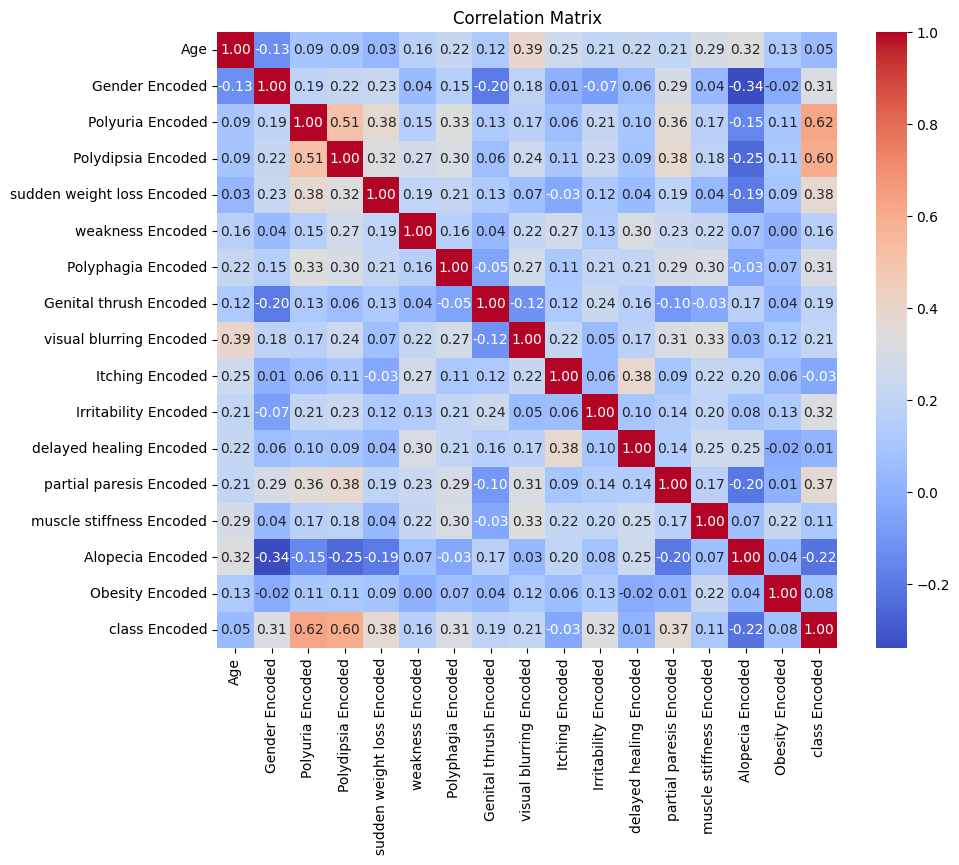

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## SVM

# SVM MODEL WITH LINEAR KERNEL

Accuracy: 0.8085106382978723
Precision: 0.8158791563046881
Recall: 0.8085106382978723
F1-score: 0.8018517931318768
Confusion Matrix:
[[12  7]
 [ 2 26]]


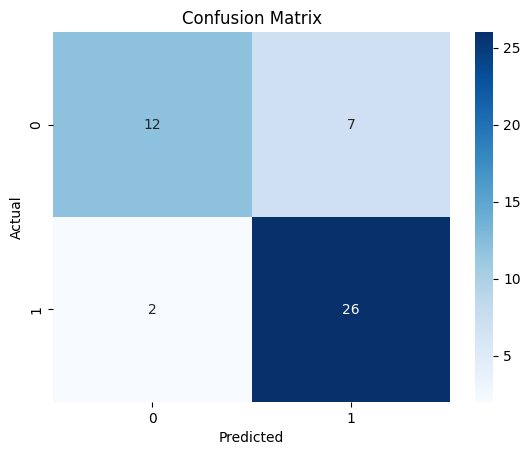

In [ ]:

X = data.drop('class Encoded', axis=1)
y = data['class Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)




sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### DECISION TREE

Accuracy: 0.9148936170212766
Precision: 0.925531914893617
Recall: 0.9148936170212766
F1-score: 0.9127242386316229
Confusion Matrix:
[[15  4]
 [ 0 28]]


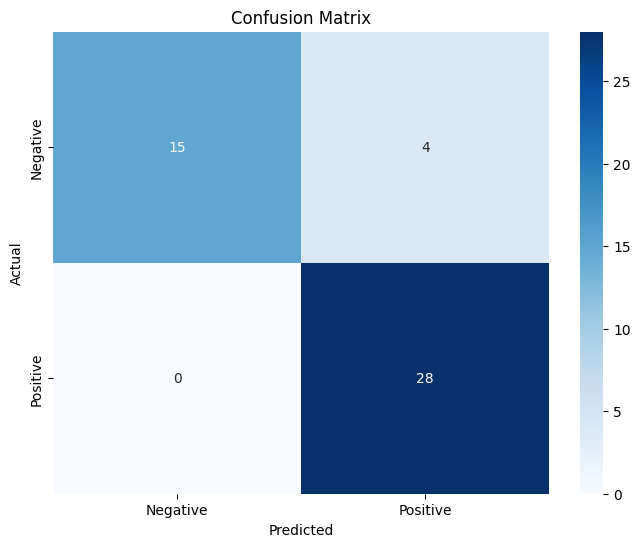

In [ ]:
X = data.drop(columns=['class Encoded'])
y = data['class Encoded']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")



class_names = list(class_mapping.keys())

ordered_class_names = [k for k, v in sorted(class_mapping.items(), key=lambda item: item[1])]

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=ordered_class_names, yticklabels=ordered_class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:

results = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'SVM': [0.8085, 0.8158, 0.8085, 0.8018],
    'Decision Tree': [0.9148, 0.9255, 0.9148, 0.9127]
}

comparison_df = pd.DataFrame(results)

print("Model Performance Comparison Table:")
print(comparison_df)

Model Performance Comparison Table:
      Metric     SVM  Decision Tree
0   Accuracy  0.8085         0.9148
1  Precision  0.8158         0.9255
2     Recall  0.8085         0.9148
3   F1 Score  0.8018         0.9127
